# Korean corona19 확진자 semi-log 그래프

In [0]:
x = log(확진자수)
y = 확진자수 증가량

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date, timedelta

%matplotlib inline

In [0]:
df = pd.read_csv('patient.csv')
df

id     sex  birth_year  ... released_date deceased_date     state
0        1  female      1984.0  ...    2020-02-06           NaN  released
1        2    male      1964.0  ...    2020-02-05           NaN  released
2        3    male      1966.0  ...    2020-02-12           NaN  released
3        4    male      1964.0  ...    2020-02-09           NaN  released
4        5    male      1987.0  ...           NaN           NaN  isolated
...    ...     ...         ...  ...           ...           ...       ...
3145  3146     NaN         NaN  ...           NaN           NaN  isolated
3146  3147     NaN         NaN  ...           NaN           NaN  isolated
3147  3148     NaN         NaN  ...           NaN           NaN  isolated
3148  3149     NaN         NaN  ...           NaN           NaN  isolated
3149  3150     NaN         NaN  ...           NaN           NaN  isolated

[3150 rows x 14 columns]

In [0]:
# get daily confirmed count
daily_count = df.groupby(df.confirmed_date).id.count()

daily_count = pd.DataFrame(daily_count)
daily_count

id
confirmed_date     
2020-01-20        1
2020-01-24        1
2020-01-26        1
2020-01-27        1
2020-01-30        3
2020-01-31        4
2020-02-01        1
2020-02-02        3
2020-02-04        1
2020-02-05        5
2020-02-06        3
2020-02-09        3
2020-02-10        1
2020-02-16        2
2020-02-18        9
2020-02-19       26
2020-02-20       39
2020-02-21      100
2020-02-22      229
2020-02-23      169
2020-02-24      231
2020-02-25      143
2020-02-26      285
2020-02-27      505
2020-02-28      571
2020-02-29      813

In [0]:
# 3월 2일, 3월 3일 추가
day_plus = pd.DataFrame([586, 476, 974], index = ['2020-03-01','2020-03-02', '2020-03-03'], columns = ['id'] )
daily_count = pd.concat([daily_count, day_plus])
daily_count

id
2020-01-20    1
2020-01-24    1
2020-01-26    1
2020-01-27    1
2020-01-30    3
2020-01-31    4
2020-02-01    1
2020-02-02    3
2020-02-04    1
2020-02-05    5
2020-02-06    3
2020-02-09    3
2020-02-10    1
2020-02-16    2
2020-02-18    9
2020-02-19   26
2020-02-20   39
2020-02-21  100
2020-02-22  229
2020-02-23  169
2020-02-24  231
2020-02-25  143
2020-02-26  285
2020-02-27  505
2020-02-28  571
2020-02-29  813
2020-03-01  586
2020-03-02  476
2020-03-03  974

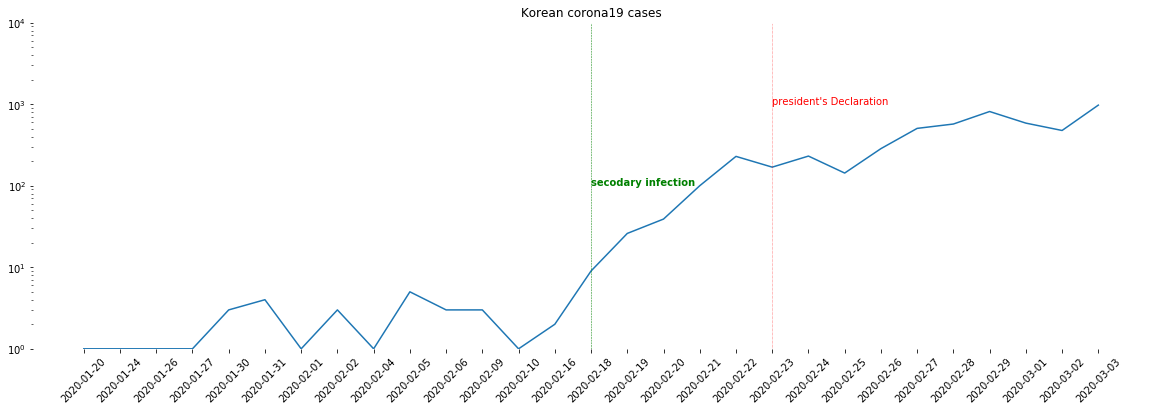

In [0]:
plt.rcParams['figure.figsize']=20,6
plt.semilogy(daily_count)
plt.title('Korean corona19 cases')
plt.xticks(rotation=45)
plt.ylim([1,10000])
plt.axvline(x='2020-02-18', color='green', ls='--', lw='0.5')
plt.axvline(x='2020-02-23', color='red', ls='dotted', lw='0.5')
plt.text(x='2020-02-18', y=100, s='secodary infection',color='green', fontweight='bold')
plt.text(x='2020-02-23', y=1000, s='president\'s Declaration',color='red')

plt.box(False)
plt.show()

In [0]:
# 대확산시기(31번확진자) 이후로 나눠서 그래프 그려보기
daily_count_f = daily_count.iloc[12:]
daily_count_f

id
2020-02-10    1
2020-02-16    2
2020-02-18    9
2020-02-19   26
2020-02-20   39
2020-02-21  100
2020-02-22  229
2020-02-23  169
2020-02-24  231
2020-02-25  143
2020-02-26  285
2020-02-27  505
2020-02-28  571
2020-02-29  813
2020-03-01  586
2020-03-02  476
2020-03-03  974

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  """


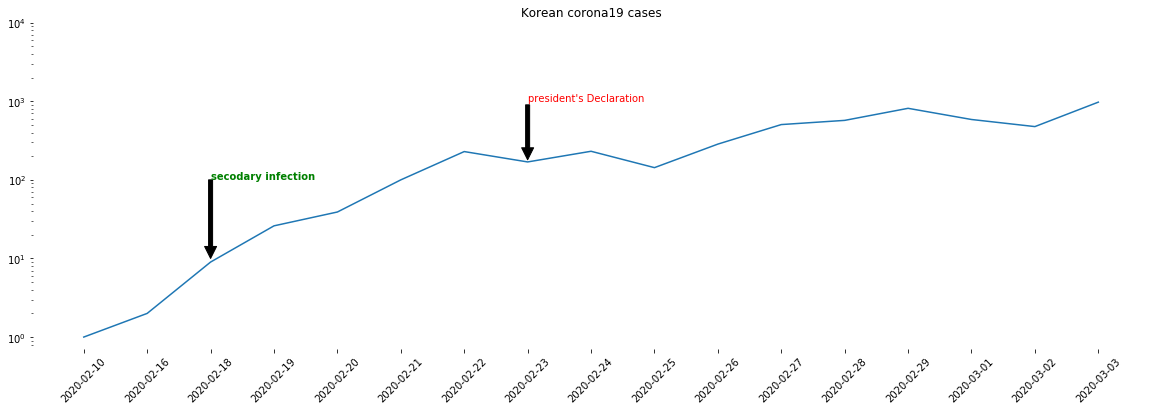

In [0]:
# 23일 비상시국 표시한 그래프

plt.semilogy(daily_count_f)
plt.title('Korean corona19 cases')
plt.xticks(rotation=45)
plt.ylim([0,10000])
plt.annotate('',xy=('2020-02-18',10), xytext=('2020-02-18',100), arrowprops=dict(facecolor='black'))
plt.annotate('',xy=('2020-02-23',180), xytext=('2020-02-23',900), arrowprops=dict(facecolor='black'))
plt.text(x='2020-02-18', y=100, s='secodary infection',color='green', fontweight='bold')
plt.text(x='2020-02-23', y=1000, s='president\'s Declaration',color='red')
plt.box(False)
plt.show()

In [0]:
# 누적된 확진자수 선형회귀
accumulated_count = daily_count.cumsum()
accumulated_count_f=accumulated_count.iloc[12:]
accumulated_count_f

id
2020-02-10    28
2020-02-16    30
2020-02-18    39
2020-02-19    65
2020-02-20   104
2020-02-21   204
2020-02-22   433
2020-02-23   602
2020-02-24   833
2020-02-25   976
2020-02-26  1261
2020-02-27  1766
2020-02-28  2337
2020-02-29  3150
2020-03-01  3736
2020-03-02  4212
2020-03-03  5186

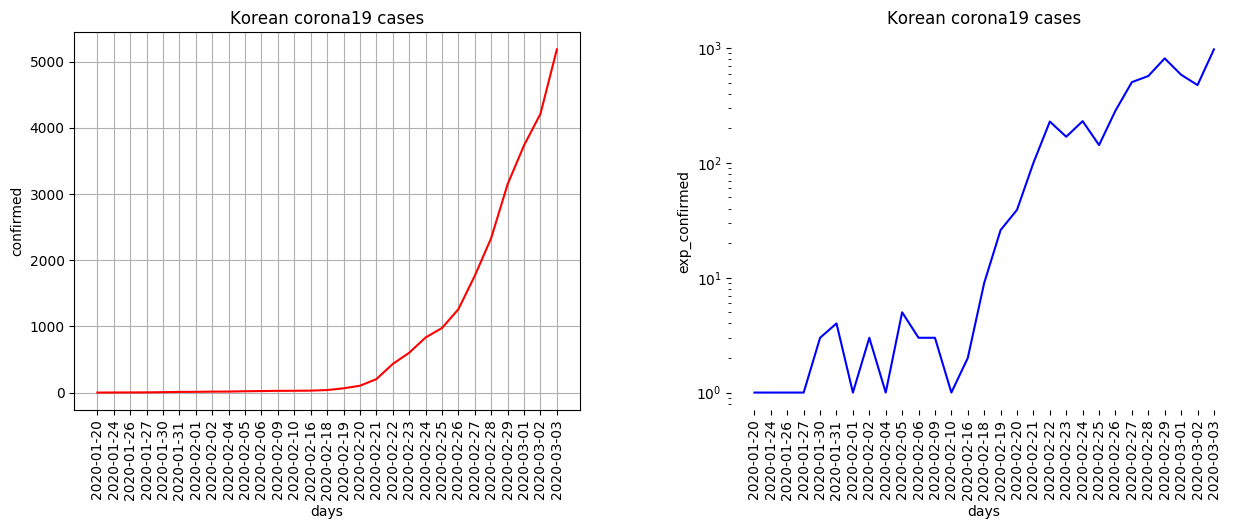

In [0]:
plt.figure(figsize=(15,5), num=1,dpi=100,facecolor='white')
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)

# first suplot .......
plt.subplot(1,2,1)
plt.plot(accumulated_count,'r') # value= A*t 선형회귀 1차방정식 그래프를 그린다
plt.title('Korean corona19 cases')
plt.xlabel('days')
plt.ylabel('confirmed')
plt.xticks(rotation='vertical')
plt.grid()


# second suplot .......
ax=plt.subplot(1,2,2)
plt.semilogy(daily_count, 'b')
plt.title('Korean corona19 cases')
plt.xlabel('days')
plt.ylabel('exp_confirmed')
plt.xticks(rotation='vertical')
plt.box(False)
plt.show()

<Figure size 936x288 with 0 Axes>

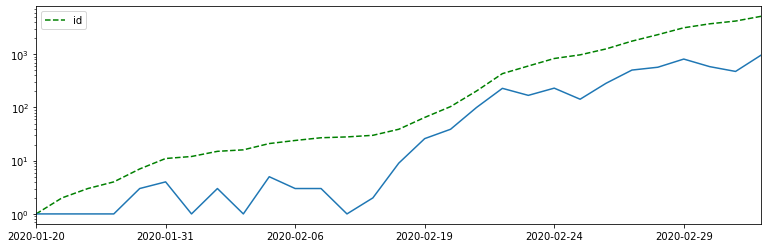

In [0]:
plt.rcParams['figure.figsize']=13,4
plt.figure()
accumulated_count.plot(style='g--') # 기존에 만든 선형회귀가 안그려지고 ? 누적로그함수??
plt.semilogy(daily_count) # semilogy 함수를 쓰면 둘다 같이 반영되는건가?????????????????

#plt.plot(accumulated_count) 

(1, 10000)

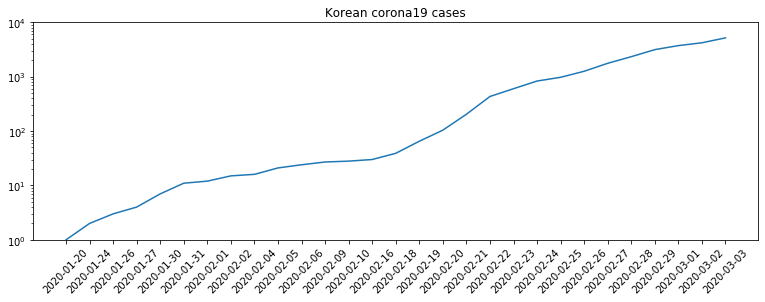

In [0]:
# 누적확진자수로 하면 10^2 - 10^4 증가폭이 너무 소폭으로 보여짐..... 이건 아닌듯
plt.semilogy(accumulated_count)
plt.title('Korean corona19 cases')
plt.xticks(rotation=45)
plt.ylim([1,10000])

#Double Yaxis
https://matplotlib.org/gallery/api/two_scales.html

#Multiple Yaxis With Spines
 https://matplotlib.org/3.1.1/gallery/ticks_and_spines/multiple_yaxis_with_spines.html

 # 그래프 종류별 그리기, 그래프 겹치기, 그래프 나눠그리기 등등
 https://pandas.pydata.org/pandas-docs/version/0.12/visualization.html

<Figure size 1440x432 with 0 Axes>

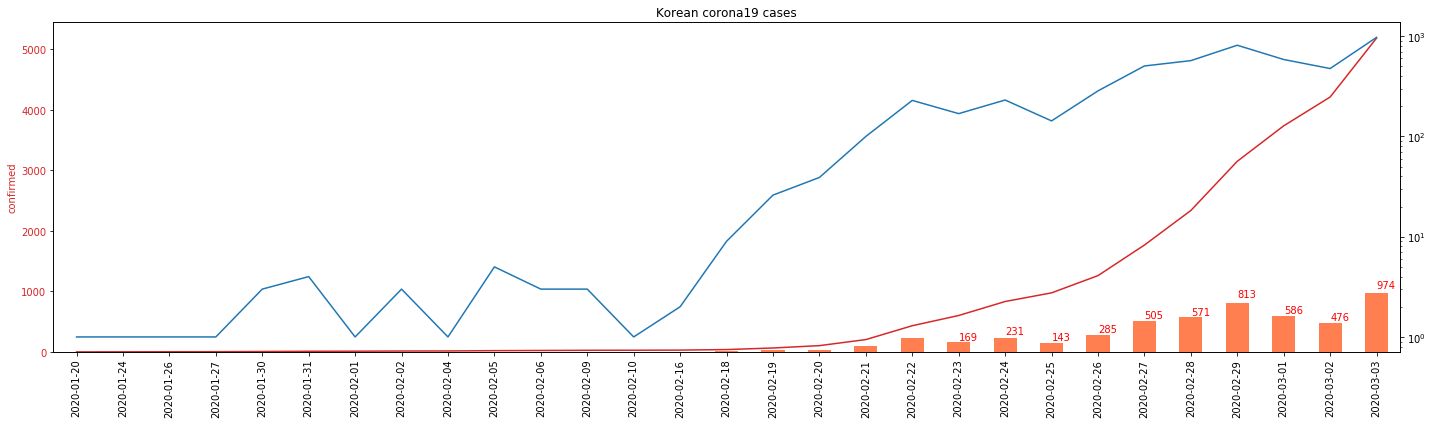

In [0]:
plt.rcParams['figure.figsize']=20,6

plt.subplots_adjust(hspace = 0.5, wspace = 0.3)
fig, ax1 = plt.subplots()
color = 'tab:red'
#ax1.set_xlabel('time (days)')
ax1.set_ylabel('confirmed', color=color)
ax1.plot(accumulated_count, color=color)
ax1.tick_params(axis='y', labelcolor=color)

daily_count['id'].plot(kind='bar', color=['coral'], )
plt.text(x='2020-02-23', y=200, s='169',color='red') ;plt.text(x='2020-02-24', y=300, s='231',color='red') 
plt.text(x='2020-02-25', y=200, s='143',color='red') ;plt.text(x='2020-02-26', y=330, s='285',color='red') 
plt.text(x='2020-02-27', y=560, s='505',color='red') ;plt.text(x='2020-02-28', y=610, s='571',color='red') 
plt.text(x='2020-02-29', y=900, s='813',color='red') ;plt.text(x='2020-03-01', y=640, s='586',color='red')
plt.text(x='2020-03-02', y=520, s='476',color='red') ;plt.text(x='2020-03-03', y=1050, s='974',color='red')
ax2 = ax1.twinx()
ax2 =plt.semilogy(daily_count)

plt.title('Korean corona19 cases')
plt.xlabel('days')
#plt.xticks(rotation=45)
#plt.xticks(rotation='vertical')
color = 'tab:blue'
#ax2.set_ylabel('semi-log', color=color) 
#ax2.plt.semilogy(daily_count)
#ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

<Figure size 1440x432 with 0 Axes>

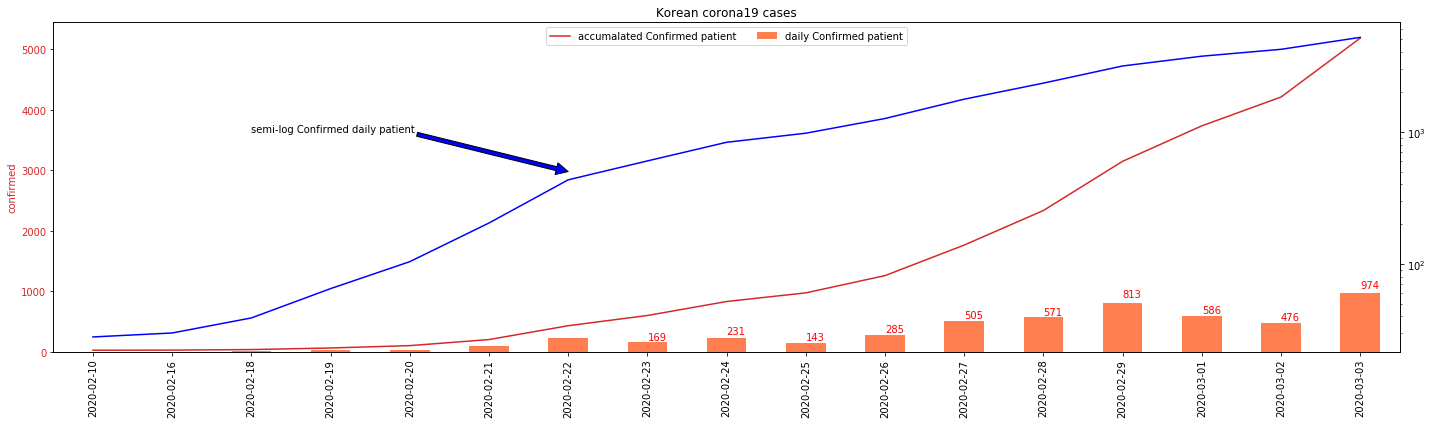

In [0]:
plt.rcParams['figure.figsize']=20,6

plt.subplots_adjust(hspace = 0.5, wspace = 0.3)
fig, ax1 = plt.subplots()
color = 'tab:red'
#ax1.set_xlabel('time (days)')
ax1.set_ylabel('confirmed', color=color)
ax1.plot(accumulated_count_f, color=color,  label='accumalated Confirmed patient')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend()

daily_count_f['id'].plot(kind='bar', color=['coral'], label ='daily Confirmed patient')
plt.legend(loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1)) # 범례 상단부 수평하게 그리기

plt.text(x='2020-02-23', y=200, s='169',color='red') ;plt.text(x='2020-02-24', y=300, s='231',color='red') 
plt.text(x='2020-02-25', y=200, s='143',color='red') ;plt.text(x='2020-02-26', y=330, s='285',color='red') 
plt.text(x='2020-02-27', y=560, s='505',color='red') ;plt.text(x='2020-02-28', y=610, s='571',color='red') 
plt.text(x='2020-02-29', y=900, s='813',color='red') ;plt.text(x='2020-03-01', y=640, s='586',color='red')
plt.text(x='2020-03-02', y=520, s='476',color='red') ;plt.text(x='2020-03-03', y=1050, s='974',color='red')
ax2 = ax1.twinx()
ax2 =plt.semilogy(accumulated_count_f, color='blue')
plt.title('Korean corona19 cases')
plt.xlabel('days')
#plt.xticks(rotation=45)
#plt.xticks(rotation='vertical')
color = 'tab:blue'
#ax2.set_ylabel('semi-log', color=color) 
#ax2.plt.semilogy(daily_count)
#ax2.tick_params(axis='y', labelcolor=color)
plt.annotate('semi-log Confirmed daily patient',xy=('2020-02-22',500), xytext=('2020-02-18',1000), arrowprops=dict(facecolor='blue'))
fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()
